#### Importação das Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('../../source_data/vendas_regiao.csv', sep=',', encoding='latin1')


In [6]:
df.head()

,ID_Cliente,Nome_Cliente,id_estado,sigla,estado,regiao,ID_Venda,Data,SKU_Produto,Categoria,Nome_Produto,Quantidade,Preco,valor_venda,Canal
0,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,33,2023-05-18,SKU-53822,Brinquedos,Quebra-cabeça,10,122.47,1224.70,Loja Física
1,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,844,2023-03-30,SKU-97371,Esporte,Patins,3,237.06,711.18,Loja Física
2,2,Srta. Kamilly da Rocha,4,AM,Amazonas,Norte,931,2023-12-28,SKU-50582,Eletrônicos,Laptop,5,4526.60,22633.00,Online
3,3,Amanda Farias,10,MA,Maranhão,Nordeste,82,2023-11-22,SKU-97371,Esporte,Patins,8,237.06,1896.48,Online
4,3,Amanda Farias,10,MA,Maranhão,Nordeste,373,2023-01-14,SKU-69331,Casa,Organizador de Gavetas,3,136.47,409.41,Online


In [12]:
vendas_regiao = df.groupby(['regiao', 'Canal'])['valor_venda'].sum().reset_index()
vendas_regiao.sort_values(by='valor_venda', ascending=False, inplace=True)
vendas_regiao 

,regiao,Canal,valor_venda
3,Nordeste,Online,758777.45
4,Norte,Loja Física,583467.33
2,Nordeste,Loja Física,559776.56
5,Norte,Online,430254.68
1,Centro-Oeste,Online,318851.53
9,Sul,Online,233708.81
6,Sudeste,Loja Física,228608.08
8,Sul,Loja Física,221261.09
0,Centro-Oeste,Loja Física,135031.15
7,Sudeste,Online,115019.85


#### Gráfico de Linhas
***
Um gráfico de linhas é uma representação visual de dados onde pontos de dados são conectados por linhas para mostrar mudanças ao longo de um eixo, geralmente o tempo. Cada ponto representa um valor específico em um determinado momento. Esse tipo de gráfico é ideal para visualizar tendências, variações e padrões ao longo do tempo, como crescimento de vendas, evolução de preços ou mudanças em medidas científicas. É amplamente utilizado em análise de dados financeiros, estudos de mercado e pesquisa científica para facilitar a interpretação de dados sequenciais.

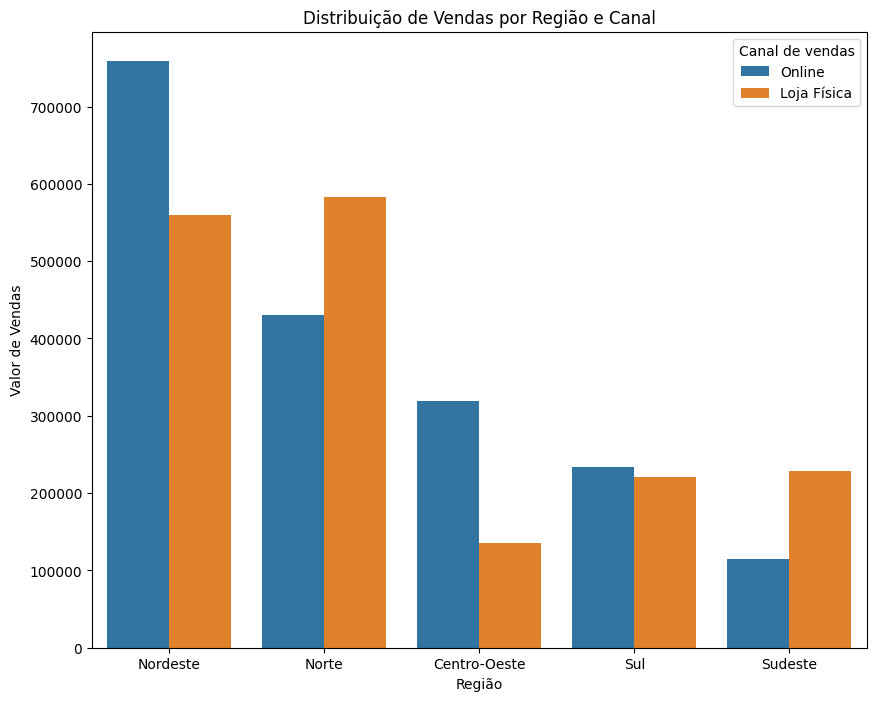

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(data=vendas_regiao,
             x='regiao',
             y='valor_venda',
             hue='Canal')
plt.title('Distribuição de Vendas por Região e Canal')
plt.xlabel('Região')
plt.ylabel('Valor de Vendas')
plt.legend(title='Canal de vendas')


#### Gráfico de Barras
***
Um gráfico de barras é uma representação visual que usa barras retangulares para mostrar e comparar valores entre diferentes categorias. Cada barra representa uma categoria e seu tamanho é proporcional ao valor que representa. Esse tipo de gráfico é útil para visualizar e comparar dados de forma clara, sendo amplamente utilizado em relatórios, pesquisas e análises estatísticas.

In [27]:
df.head()

,ID_Cliente,Nome_Cliente,id_estado,sigla,estado,regiao,ID_Venda,Data,SKU_Produto,Categoria,Nome_Produto,Quantidade,Preco,valor_venda,Canal
0,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,33,2023-05-18,SKU-53822,Brinquedos,Quebra-cabeça,10,122.47,1224.70,Loja Física
1,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,844,2023-03-30,SKU-97371,Esporte,Patins,3,237.06,711.18,Loja Física
2,2,Srta. Kamilly da Rocha,4,AM,Amazonas,Norte,931,2023-12-28,SKU-50582,Eletrônicos,Laptop,5,4526.60,22633.00,Online
3,3,Amanda Farias,10,MA,Maranhão,Nordeste,82,2023-11-22,SKU-97371,Esporte,Patins,8,237.06,1896.48,Online
4,3,Amanda Farias,10,MA,Maranhão,Nordeste,373,2023-01-14,SKU-69331,Casa,Organizador de Gavetas,3,136.47,409.41,Online


In [ ]:
df.info()
# data está como objeto -> tranformar para datatime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Cliente    1000 non-null   int64  
 1   Nome_Cliente  1000 non-null   object 
 2   id_estado     1000 non-null   int64  
 3   sigla         1000 non-null   object 
 4   estado        1000 non-null   object 
 5   regiao        1000 non-null   object 
 6   ID_Venda      1000 non-null   int64  
 7   Data          1000 non-null   object 
 8   SKU_Produto   1000 non-null   object 
 9   Categoria     1000 non-null   object 
 10  Nome_Produto  1000 non-null   object 
 11  Quantidade    1000 non-null   int64  
 12  Preco         1000 non-null   float64
 13  valor_venda   1000 non-null   float64
 14  Canal         1000 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [32]:
df['Data'] = pd.to_datetime(df['Data'])
df['mes'] = df['Data'].dt.month 
df['data_mes'] = df['Data'].dt.to_period('M')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Cliente    1000 non-null   int64         
 1   Nome_Cliente  1000 non-null   object        
 2   id_estado     1000 non-null   int64         
 3   sigla         1000 non-null   object        
 4   estado        1000 non-null   object        
 5   regiao        1000 non-null   object        
 6   ID_Venda      1000 non-null   int64         
 7   Data          1000 non-null   datetime64[ns]
 8   SKU_Produto   1000 non-null   object        
 9   Categoria     1000 non-null   object        
 10  Nome_Produto  1000 non-null   object        
 11  Quantidade    1000 non-null   int64         
 12  Preco         1000 non-null   float64       
 13  valor_venda   1000 non-null   float64       
 14  Canal         1000 non-null   object        
 15  mes           1000 non-null   int32    

In [34]:
df.head()

,ID_Cliente,Nome_Cliente,id_estado,sigla,estado,regiao,ID_Venda,Data,SKU_Produto,Categoria,Nome_Produto,Quantidade,Preco,valor_venda,Canal,mes,data_mes
0,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,33,2023-05-18,SKU-53822,Brinquedos,Quebra-cabeça,10,122.47,1224.70,Loja Física,5,2023-05
1,1,Sr. Enzo Gabriel Azevedo,22,RO,Rondônia,Norte,844,2023-03-30,SKU-97371,Esporte,Patins,3,237.06,711.18,Loja Física,3,2023-03
2,2,Srta. Kamilly da Rocha,4,AM,Amazonas,Norte,931,2023-12-28,SKU-50582,Eletrônicos,Laptop,5,4526.60,22633.00,Online,12,2023-12
3,3,Amanda Farias,10,MA,Maranhão,Nordeste,82,2023-11-22,SKU-97371,Esporte,Patins,8,237.06,1896.48,Online,11,2023-11
4,3,Amanda Farias,10,MA,Maranhão,Nordeste,373,2023-01-14,SKU-69331,Casa,Organizador de Gavetas,3,136.47,409.41,Online,1,2023-01


In [37]:
grouped = df.groupby(['data_mes', 'regiao', 'Canal'])
vendas_mensais = grouped.agg(
    total_vendas = ('valor_venda', 'sum')
).reset_index()   

vendas_mensais['data_mes'] = vendas_mensais['data_mes'].dt.to_timestamp()




In [38]:
vendas_mensais

,data_mes,regiao,Canal,total_vendas
0,2023-01-01,Centro-Oeste,Online,37773.76
1,2023-01-01,Nordeste,Loja Física,21218.55
2,2023-01-01,Nordeste,Online,99078.20
3,2023-01-01,Norte,Loja Física,45160.63
4,2023-01-01,Norte,Online,42990.78
...,...,...,...,...
114,2023-12-01,Norte,Online,60580.11
115,2023-12-01,Sudeste,Loja Física,13429.29
116,2023-12-01,Sudeste,Online,3738.81
117,2023-12-01,Sul,Loja Física,38870.77


<Axes: xlabel='data_mes', ylabel='total_vendas'>

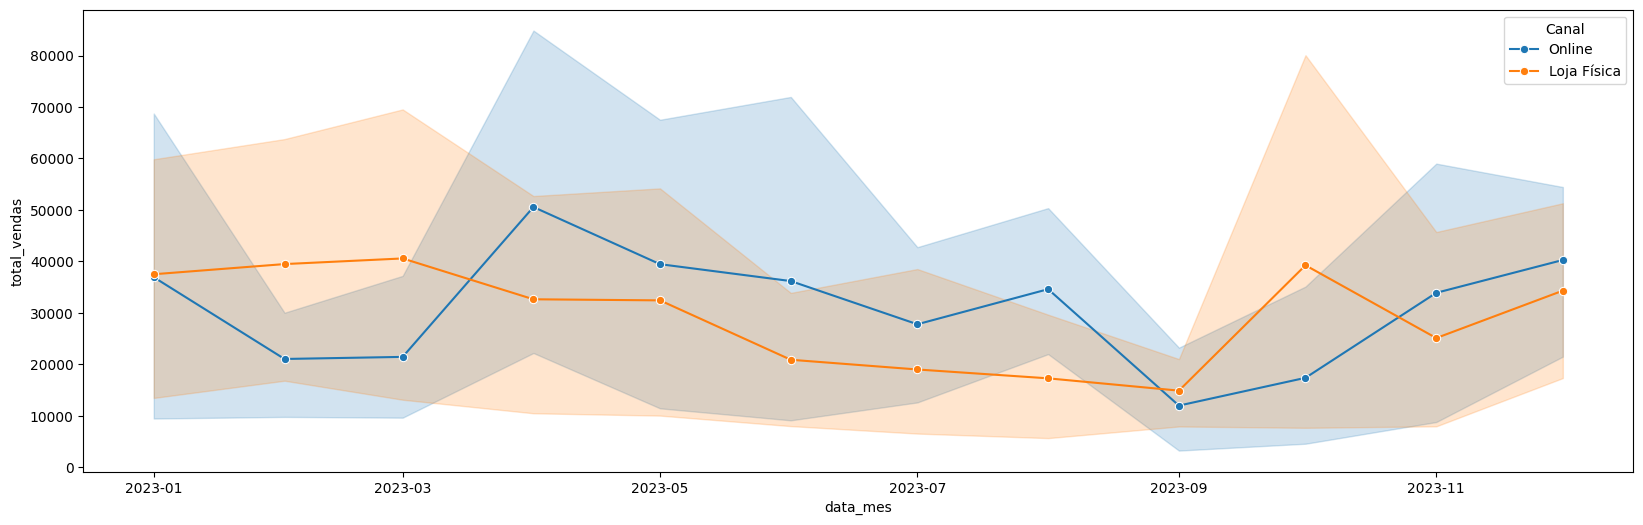

In [49]:
plt.figure(figsize=(20, 6))
sns.lineplot(data = vendas_mensais, 
             x = 'data_mes',
             y = 'total_vendas',
             hue = 'Canal',
             marker = 'o' 
             )

#### Gráfico de Dispersão
***
Um gráfico de dispersão é uma representação visual usada para mostrar a relação entre duas variáveis. Nele, cada ponto no gráfico indica a posição de um par de valores, com um valor no eixo X e outro no eixo Y. Esse tipo de gráfico é ideal para identificar padrões, correlações ou tendências entre as variáveis, como a ligação entre a altura e o peso de indivíduos, ou o impacto de uma variável sobre outra. É amplamente utilizado em análises estatísticas, pesquisa científica e estudos de mercado para visualizar como duas variáveis podem estar relacionadas.

#### Gráfico de Histograma
***
Um histograma é uma representação visual que ilustra a distribuição de um conjuento de dados, destacando a frequência de ocorrência em diferentes intervalos. Ele exibe a contagem de dados dentro de intervalos específicos, facilitando a visualização da dispersão e da concentração dos dados. 

No gráfico, as "barras" representam os invervalos, ou "bins", com a altura de cada barra indicando a quantidade de dados que caem dentro daquele intervalo. A largura das barras corresponde ao tamanho dos invervalos. O histograma permite a rápida identificação de padrões, como picos e lacunas, e ajuda a compreender a forma geral da distribuição dos dados. É amplamente utilizado em análises exploratórias para avaliar a distribuição e a variabilidade dos dados.

#### Gráfico Boxplot
***
Um boxplot é uma representação visual que resume a distribuição de um conjunto de dados, destacando seus principais estatísticos. Ele exibe a mediana, os quartis e os valores extremos, permitindo uma rápida identificação de assimetrias, dispersão e possíveis outliers. 

No gráfico, a "caixa" central mostra a distribuição dos 50% do meio dos dados, com a linha dentro da caixa representando a mediana. As "linhas" se estendem até os valores mínimos e máximos, enquanto pontos fora dessas linhas indicam outliers. O boxplot é amplamente utilizado em análises exploratórias de dados para comparar distribuições entre diferentes grupos ou conjuntos de dados.